# 1.0 Exploratory Data Analysis
** Summary: ** Ingest, explore and summarize data.

In [3]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

# Customizations
pd.options.mode.chained_assignment = None
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## 1. Load and Explore Data

* train.csv
* test.csv
* historical_transactions.csv
* merchants.csv
* new_merchant_transactions.csv

In [4]:
# List of data files
files = !ls '../data/raw'
files

['Data_Dictionary.xlsx',
 'historical_transactions.csv',
 'merchants.csv',
 'new_merchant_transactions.csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 '~$Data_Dictionary.xlsx']

### Train and Test

In [5]:
train_df = pd.read_csv("../data/raw/train.csv", parse_dates=["first_active_month"])
test_df = pd.read_csv("../data/raw/test.csv", parse_dates=["first_active_month"])
print("Number of rows and columns in train set : ",train_df.shape)
print("Number of rows and columns in test set : ",test_df.shape)

Number of rows and columns in train set :  (201917, 6)
Number of rows and columns in test set :  (123623, 5)


In [6]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


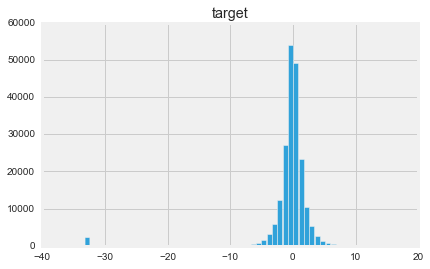

In [7]:
ax = train_df.hist(bins=60,  zorder=2, rwidth=0.9,
             column='target')

In [8]:
# Number of cases where loyalty score is less than -30
(train_df['target']<-30).sum()

2207

In [9]:
# Number of cases where loyalty score is greater than 10
(train_df['target']>10).sum()

48

In [27]:
train_df.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


#### First Active Month

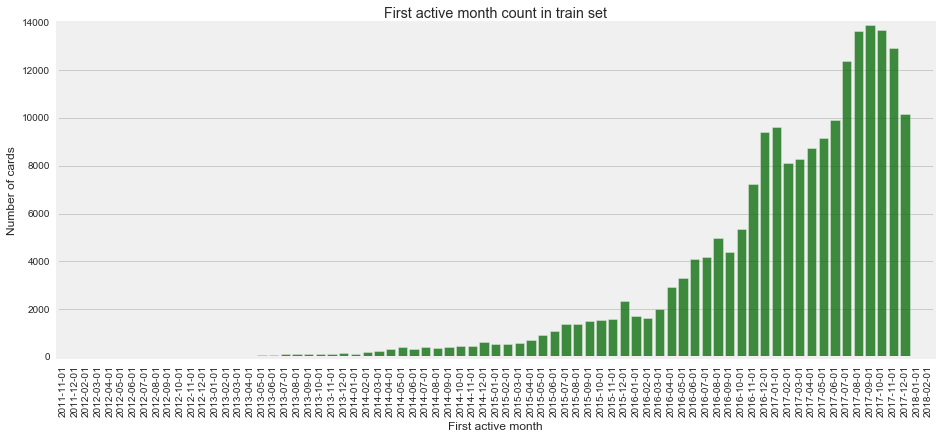

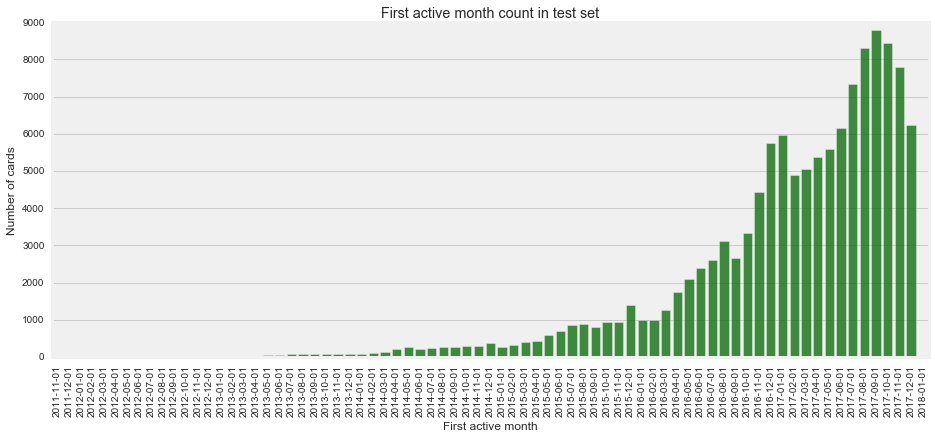

In [22]:
# Distribution of first active month in train and test 
cnt_srs = train_df['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

cnt_srs = test_df['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in test set")
plt.show()

#### Feature 1,2,3

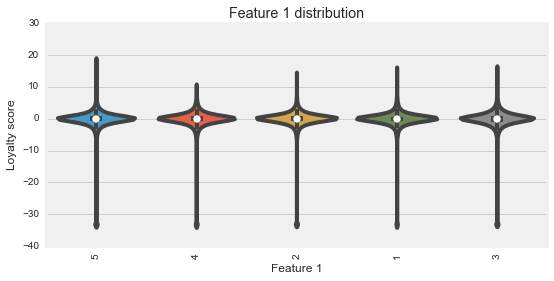

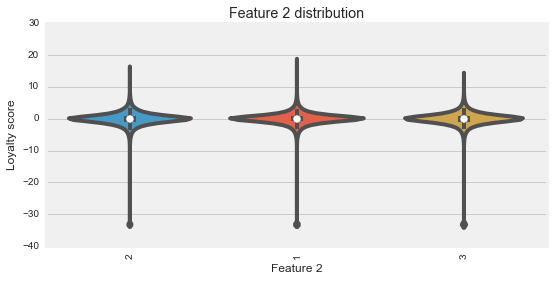

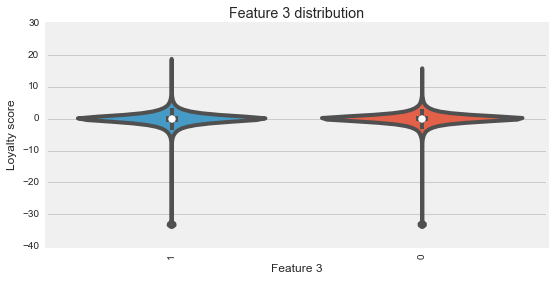

In [25]:
# feature 1
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_1", y='target', data=train_df)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

# feature 2
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_2", y='target', data=train_df)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()

# feature 3
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_3", y='target', data=train_df)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 3', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 3 distribution")
plt.show()

In [31]:
historical_df = pd.read_csv('../data/raw/historical_transactions.csv',
                               parse_dates=['purchase_date'])
merchants_df = pd.read_csv('../data/raw/merchants.csv')
new_merchant_df = pd.read_csv('../data/raw/new_merchant_transactions.csv',
                               parse_dates=['purchase_date'])



Number of rows and columns in historical set :  (29112361, 14)


NameError: name 'merchant_df' is not defined

In [32]:
print("Number of rows and columns in historical set : ",historical_df.shape)
print("Number of rows and columns in merchant set : ",merchants_df.shape)
print("Number of rows and columns in new merchant transactions set : ",new_merchant_df.shape)

Number of rows and columns in historical set :  (29112361, 14)
Number of rows and columns in merchant set :  (334696, 22)
Number of rows and columns in new merchant transactions set :  (1963031, 14)
